# Credit EDA Case Study - Loan Defaulter Exploration & Analysis 

In [74]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [75]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

#import plotly
#import plotly.express as px
pd.set_option('display.max_columns',122)

# Application Data

## STEP 1  Importing the application CSV file.

In [76]:
app=pd.read_csv("application_data.csv")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## STEP 2 Checking the structure of the data.

### Number of rows & columns

In [77]:
#checking the rows and columns in the app_dataframe
a=len(app.index)
b=len(app.columns)
print("Number of rows:"+str(a))
print("Number of columns:"+str(b))


Number of rows:307511
Number of columns:122


In [78]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data Frame Information 

In [79]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

### Unique value count 

In [80]:
app.nunique().sort_values(ascending=False)

SK_ID_CURR                    307511
EXT_SOURCE_2                  119831
EXT_SOURCE_1                  114584
DAYS_BIRTH                     17460
DAYS_REGISTRATION              15688
AMT_ANNUITY                    13672
DAYS_EMPLOYED                  12574
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5603
LIVINGAREA_MODE                 5301
LIVINGAREA_MEDI                 5281
LIVINGAREA_AVG                  5199
TOTALAREA_MODE                  5116
BASEMENTAREA_MODE               3841
BASEMENTAREA_AVG                3780
DAYS_LAST_PHONE_CHANGE          3773
BASEMENTAREA_MEDI               3772
LANDAREA_MODE                   3563
LANDAREA_MEDI                   3560
LANDAREA_AVG                    3527
NONLIVINGAREA_MODE              3327
NONLIVINGAREA_MEDI              3323
NONLIVINGAREA_AVG               3290
COMMONAREA_MEDI                 3202
COMMONAREA_AVG                  3181
COMMONAREA_MODE                 3128
AMT_INCOME_TOTAL                2548
A

## STEP 3.1
## Finding the missing value in the dataframe and highlighted in total numbers & percentage. 

In [81]:
def missing_value(value):
    total=value.isnull().sum().sort_values(ascending=False)
    percent=(value.isnull().sum()/value.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [82]:
missing_value(app).head(25)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


### Plotting the columns which has more than 50% of Null values in dataframe. 

In [83]:
def plot_null(data):
    NA_col=data.isnull().sum()
    NA_col=NA_col[NA_col.values>(0.50*len(data))]
    plt.figure(figsize=(20,4))
    NA_col.plot(kind='bar')
    plt.title('List of Columns having Null_Values more than 50%')
    plt.show()
    

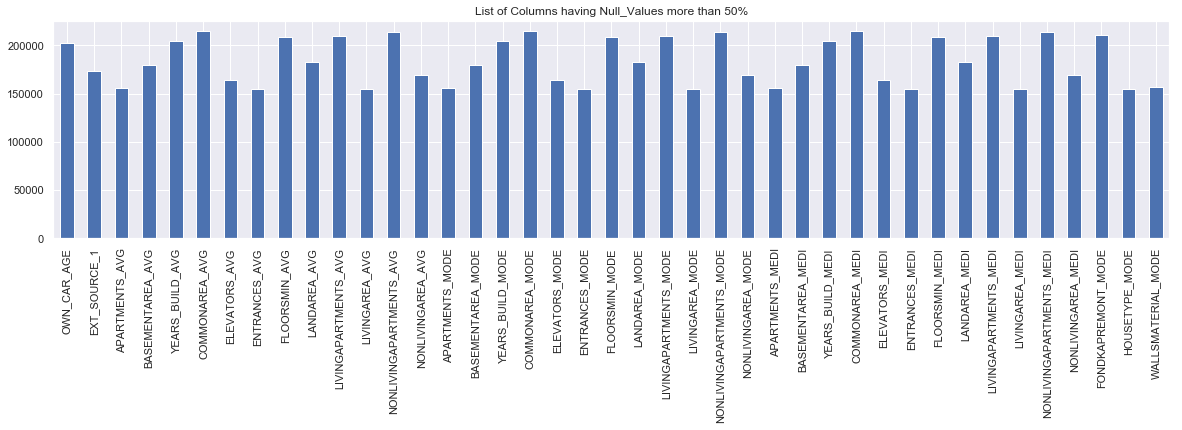

In [84]:
plot_null(app)

*The above columns in the chart will become insignificant for our analysis, since it all contain maximum null values.   

## STEP 3.2 
## Function to remove the Null values above  50%.

In [85]:
#Dropping the Null Values, which are insignificant (mentioned in the bar chart above) for our analysis. 
#Here we are droping columns which has more than 50% of null values. 
def removeNulls(dataframe, axis =1, percent=0.5):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.5(50%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df



In [86]:
app=removeNulls(app,axis=1,percent=0.5)

Number of Columns dropped	:  41

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 81)


### COLUMNS WITH NULL VALUES LESS THAN 50%

In [87]:
missing_value(app).head(25)

,Total,Percent
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
TOTALAREA_MODE,148431,48.268517
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307


## STEP 3.3
## For columns having less than or around 13% of missing values suggest the best metric to impute


In [88]:
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
     'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### *Best Imputation Matric:*  
> 1. From the above table it is visible that the <font color=red>mean and standard deviation</font>  of the 1st five columns 
 (namely, <font color=green>AMT_REQ_CREDIT_BUREAU_HOUR	AMT_REQ_CREDIT_BUREAU_DAY	AMT_REQ_CREDIT_BUREAU_WEEK	AMT_REQ_CREDIT_BUREAU_MON	AMT_REQ_CREDIT_BUREAU_QRT</font>  ) is <font color=red>less than 1 and the median is 0</font>. 
Therefore, the missing values can be imputed by <font color= red> 0 </font> for these columns.

> 2. For the last column, that is, <font color= green> AMT_REQ_CREDIT_BUREAU_YEAR </font>, the  <font color=red>mean and standard deviation</font> is around  <font color=red>1.9 and the median is 1</font>. Therefore for this column the null values can be replaced by <font color=red>1.5</font>


. 

### METHODS TO HANDLE OR IMPUTE THE NULL VALUES FOR CATEGORICAL VARIABLES 

### NAME_TYPE_SUITE column has approx. 4% null values 
###  Since Unacompanied category has maximum % we can use Mode method handle the null value. 

In [89]:
#Since Unaccompanied has maximum percentage, we can use MODE method to handle the null value. 
app['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

### CNT_FAM_MEMBERS we noticed only one null value, which could be replace with Mode.


In [90]:
app['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

### AMT_GOODS_PRICE being an Numerical value we handle the null values with Mean or the Median 

In [91]:
app['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

## STEP 3.4
## Check the datatypes of all the columns and change the datatypes like negative age and time etc
### Negative values of columns to be automated using absolute

In [92]:
print(app['DAYS_BIRTH'].head())
print(app['DAYS_EMPLOYED'].head())
print(app['DAYS_REGISTRATION'].head())
print(app['DAYS_LAST_PHONE_CHANGE'].head())

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64
0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64
0   -3648.0
1   -1186.0
2   -4260.0
3   -9833.0
4   -4311.0
Name: DAYS_REGISTRATION, dtype: float64
0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


In [93]:
#All the above columns are containing neagtive values which need to be handled using the abs() function.
app['DAYS_BIRTH']=app['DAYS_BIRTH'].abs()
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].abs()
app['DAYS_REGISTRATION'] = app['DAYS_REGISTRATION'].abs()
app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'].abs()

### Checking the datatype of the columns for proper conversion into appropriate one.

In [94]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [95]:
app.nunique().sort_values(ascending=False)

SK_ID_CURR                      307511
EXT_SOURCE_2                    119831
DAYS_BIRTH                       17460
DAYS_REGISTRATION                15688
AMT_ANNUITY                      13672
DAYS_EMPLOYED                    12574
DAYS_ID_PUBLISH                   6168
AMT_CREDIT                        5603
TOTALAREA_MODE                    5116
DAYS_LAST_PHONE_CHANGE            3773
AMT_INCOME_TOTAL                  2548
AMT_GOODS_PRICE                   1002
EXT_SOURCE_3                       814
FLOORSMAX_AVG                      403
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BEGINEXPLUATATION_MEDI       245
YEARS_BEGINEXPLUATATION_MODE       221
REGION_POPULATION_RELATIVE          81
ORGANIZATION_TYPE                   58
FLOORSMAX_MEDI                      49
OBS_30_CNT_SOCIAL_CIRCLE            33
OBS_60_CNT_SOCIAL_CIRCLE            33
FLOORSMAX_MODE                      25
AMT_REQ_CREDIT_BUREAU_YEAR          25
AMT_REQ_CREDIT_BUREAU_MON           24
HOUR_APPR_PROCESS_START  

In [96]:
#Using the .nunique() and .info() it is shown that the number of unique values in both these columns are less than 40 so
#they can be treated as categorical variables thy are int/float which needs to be changed into object datatype. 
app['CNT_FAM_MEMBERS']=app['CNT_FAM_MEMBERS'].astype('str')
app['CNT_CHILDREN']=app['CNT_CHILDREN'].astype('str')

## STEP 3.5 
## For numerical columns check for outliers and report them for at least 5 columns - Boxplot representation

The various quantiles will help us give a better idea 
 0.900    270000.0
0.950    337500.0
0.999    900000.0
Name: AMT_INCOME_TOTAL, dtype: float64
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


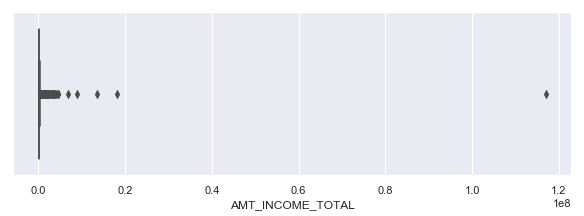

In [97]:
print('The various quantiles will help us give a better idea \n',app.AMT_INCOME_TOTAL.quantile([0.9,0.95,0.999]))
print(app.AMT_INCOME_TOTAL.describe())
plt.figure(figsize = (10,3))
ax = sns.boxplot(x= 'AMT_INCOME_TOTAL', data=app, orient="h", palette="Set1")

The various quantiles will help us give a better idea 
 0.750     808650.0
0.800     900000.0
0.900    1133748.0
0.999    2517300.0
Name: AMT_CREDIT, dtype: float64
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


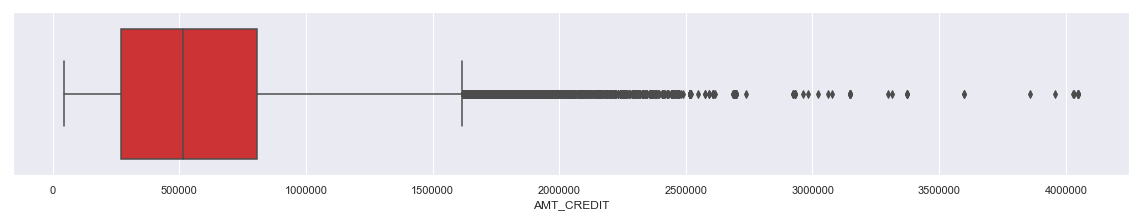

In [98]:
print('The various quantiles will help us give a better idea \n',app.AMT_CREDIT.quantile([0.75,0.8,0.9,0.999]))
print(app.AMT_CREDIT.describe())
plt.figure(figsize = (20,3))
ax = sns.boxplot(x= 'AMT_CREDIT', data=app, orient="h", palette="Set1")

The various quantiles will help us give a better idea 
 0.750     34596.0
0.800     37516.5
0.900     45954.0
0.999    110047.5
Name: AMT_ANNUITY, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


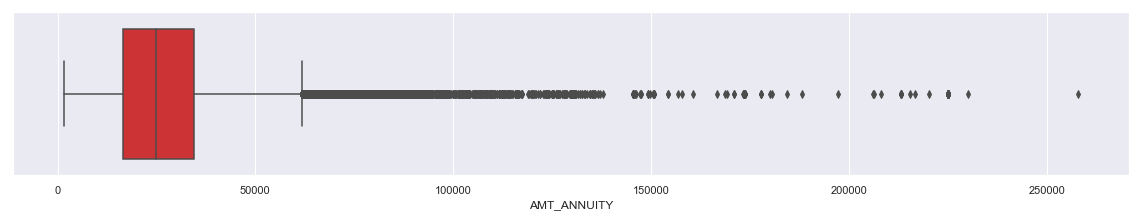

In [99]:
print('The various quantiles will help us give a better idea \n',app.AMT_ANNUITY.quantile([0.75,0.8,0.9,0.999]))
print(app.AMT_ANNUITY.describe())
plt.figure(figsize = (20,3))
ax = sns.boxplot(x= 'AMT_ANNUITY', data=app, orient="h", palette="Set1")

The various quantiles will help us give a better idea 
 0.750     34596.0
0.800     37516.5
0.900     45954.0
0.999    110047.5
Name: AMT_ANNUITY, dtype: float64
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


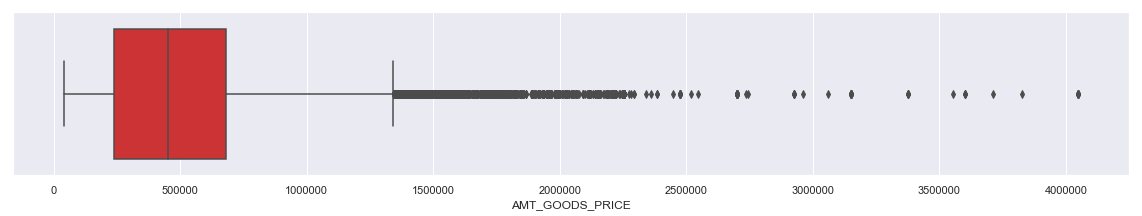

In [100]:
print('The various quantiles will help us give a better idea \n',app.AMT_ANNUITY.quantile([0.75,0.8,0.9,0.999]))
print(app.AMT_GOODS_PRICE.describe())
plt.figure(figsize = (20,3))
ax = sns.boxplot(x= 'AMT_GOODS_PRICE', data=app, orient="h", palette="Set1")

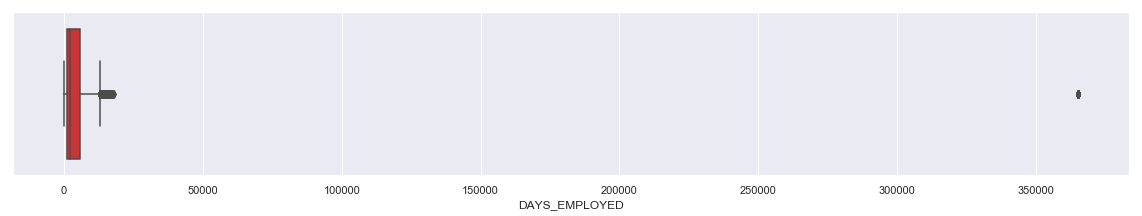

In [101]:
plt.figure(figsize = (20,3))
ax = sns.boxplot(x= 'DAYS_EMPLOYED', data=app, orient="h", palette="Set1")

### *Outliers*: Following 5 columns have outliers
> <font color = red>1. AMT_INCOME_TOTAL</font> - The number of outliers are way to many in this column. The values are skewed to the right. The median is: 1.471500e+05 and maximum value is: 1.170000e+08. Most of the outliers are beyond the .999 quantile. 

> <font color = red>2. AMT_CREDIT</font> - outliers noticed after the 25L mark as values before that may not be treated as outliers as there are quite a few of them. Values above the 25L mark fall in the .999 quantile.

> <font color = red>3. AMT_ANNUITY</font> - continous but few outliers around 22L-25L approximately

> <font color = red>4. AMT_GOODS_PRICE</font> - 35L-40L range shows outliers

> <font color = red>5. DAYS_EMPLOYED</font> - This is a continuous variable which has a range of values, however there are a few outliers. Upon furthur investigation we saw that converting days to year converts some values to 1000 years. Which are shown as outliers in the above table 

## STEP 3.6 
## Binning of continuous variables. 

In [102]:
app['INCOME_BINS'] = pd.cut(app.AMT_INCOME_TOTAL, [0, 1e5, 3e5, 5e5, 7e5, 10e5, 10e10], #bins = 4,
                                labels = ['<1L','[1L-3L]', '[3L-5L]', '[5L-7L]', '[7L-10L]', '>10L'],
                               )

In [103]:
app['CREDIT_BINS'] = pd.cut(app.AMT_CREDIT, [0, 1e5, 3e5, 5e5, 7e5, 10e5, 10e10], #bins = 4,
                                labels = ['<1L','[1L-3L]', '[3L-5L]', '[5L-7L]', '[7L-10L]', '>10L'],
                               )

In [104]:
app['AMT_ANNUITY'].isnull().sum()

12

In [105]:
app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [106]:
app['AMT_ANNUITY'].fillna(app['AMT_ANNUITY'].mean(), inplace = True)


In [107]:
app['ANNUITY_BINS'] = pd.cut(app.AMT_ANNUITY, [0, 50e3, 100e3, 150e3, 200e3, 200e10],
                                labels = ['<50K','[50K-100K]', '[100K-150K]','[150K-200K]', '>200K'],
                               )

In [108]:
app['AMT_GOODS_PRICE'].isnull().sum()

278

In [109]:
app.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [110]:
app['DAYS_BIRTH_IN_YR'] = round(app['DAYS_BIRTH']/365).astype(int)
app['YEARS_BINS'] = pd.cut(app.DAYS_BIRTH_IN_YR, [10, 20, 30, 40, 50, 60, 100],
                                      labels = ['<20', '[20-30]', '[30-40]', '[40-50]', '[50-60]', '>60'],
                                      )

## STEP 4.1 
## Check for Imbalance percentage. 

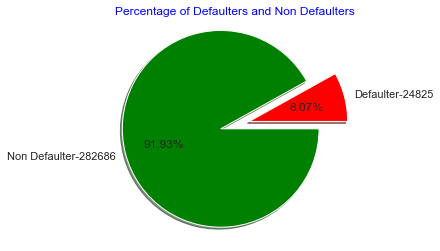

In [111]:
#Understanding the key variable Target column from the dataframe. 
pie_labels=['Defaulter-'+str(app['TARGET'][app.TARGET==1].count()),'Non Defaulter-'+str(app['TARGET'][app.TARGET==0].count())]
pie_share=[app['TARGET'][app.TARGET==1].count()/app['TARGET'].count(),
           app['TARGET'][app.TARGET==0].count()/app['TARGET'].count()] 
figureObject, axesObject = plt.subplots()
pie_colors=('red','green')
pie_explode=(.3,.0)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=0,shadow=True)
axesObject.axis('equal')
plt.title('Percentage of Defaulters and Non Defaulters',color='blue')
plt.show()

KEY VARIABLE -TARGET VARIABLE AND UNDERSTANDING THE IMBALANCE 

We have leveraged the TARGET column as the key variable, which comprises of value 0 (NonDefaulter) & 1 (Defaulter) and the above pie chart highlights same in percentage.

## STEP 4.2 
## Divide the data into 2 sets i.e TARGET == 0 and TARGET == 1

In [112]:
app_0 = app.loc[app['TARGET'] == 0] 
app_1 = app.loc[app['TARGET'] == 1] 

## STEP 4.3
## Perform univariate analysis for categories of variables for both 0 and 1. Compare the target variable across categories of categorical variables.

As mentioned above, we will be considering TARGET variable comprises of 0 (Non-Defaulter) & 1(Defaulter) as the primary variable and to correlate the same with some of the identified Categorical columns / values for this analysis and inference. 
Below we have defined a small function and visualised some the categorical values with the primary TARGET variable.  

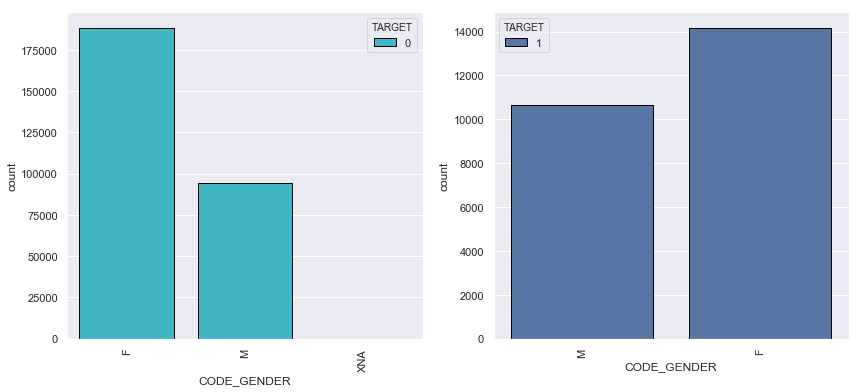

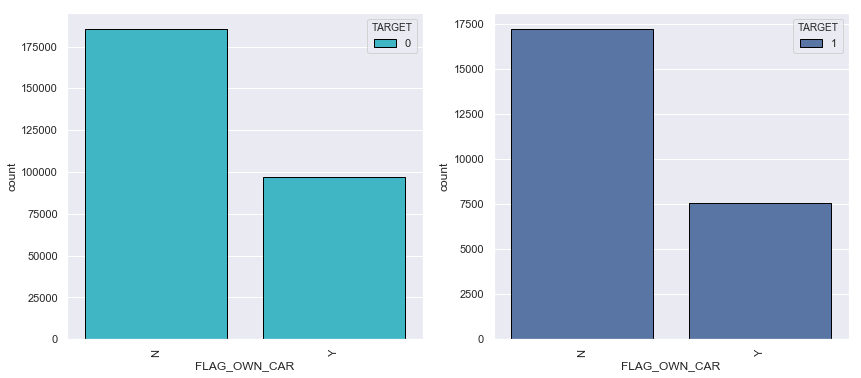

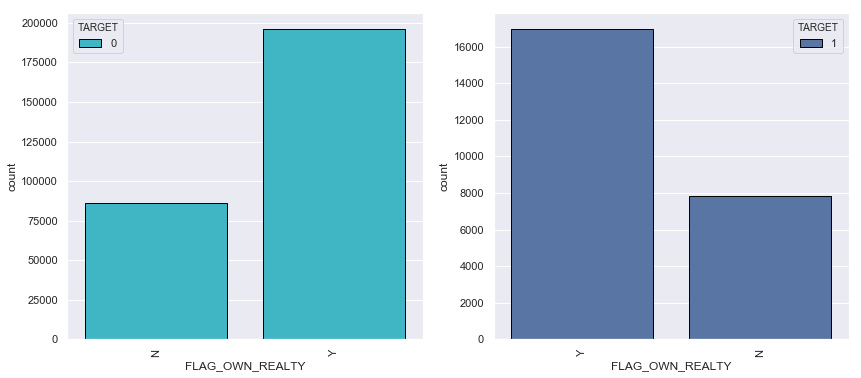

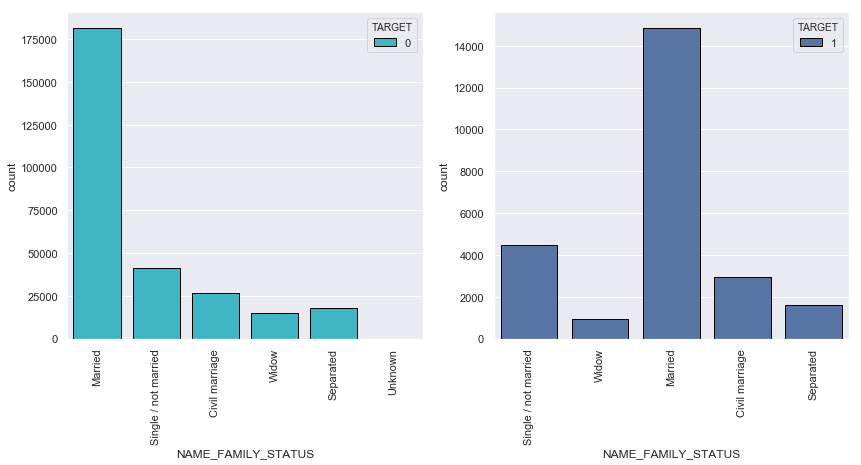

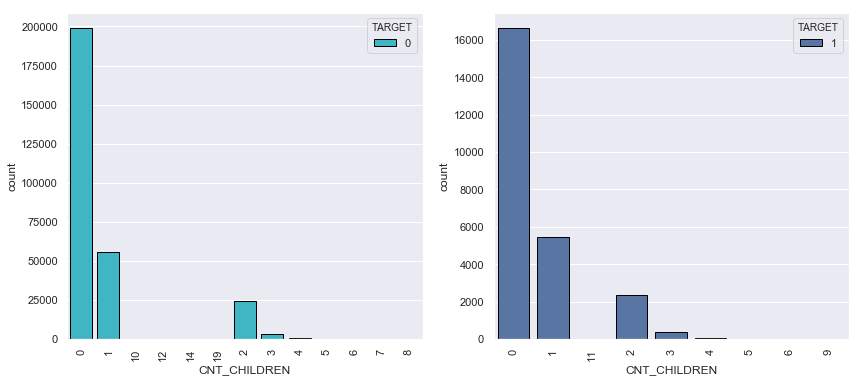

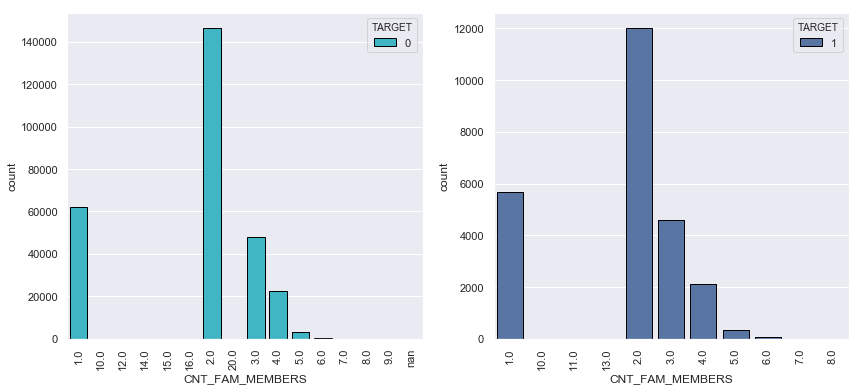

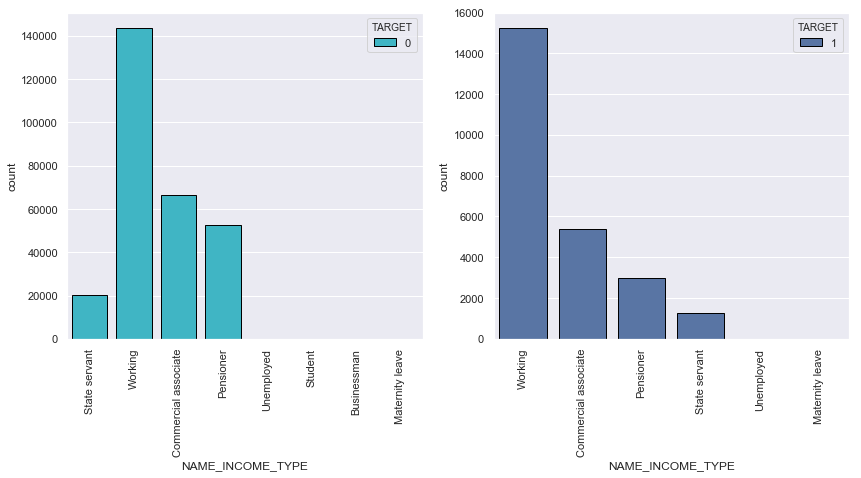

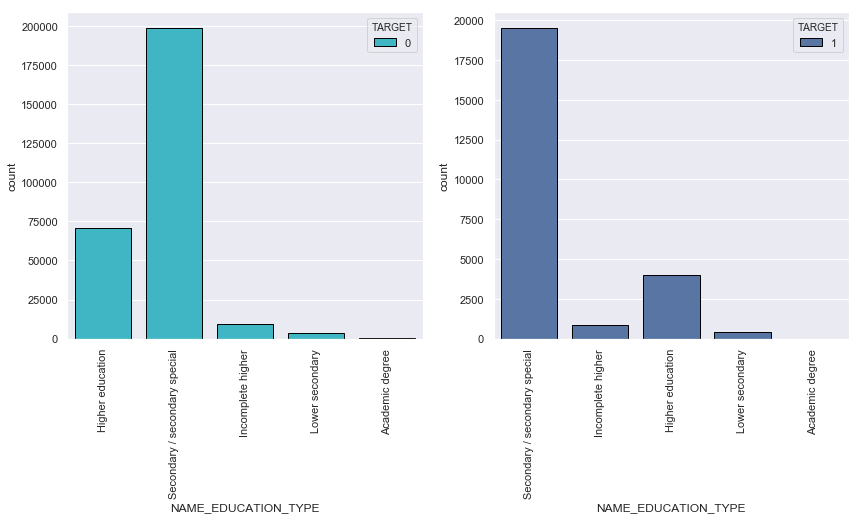

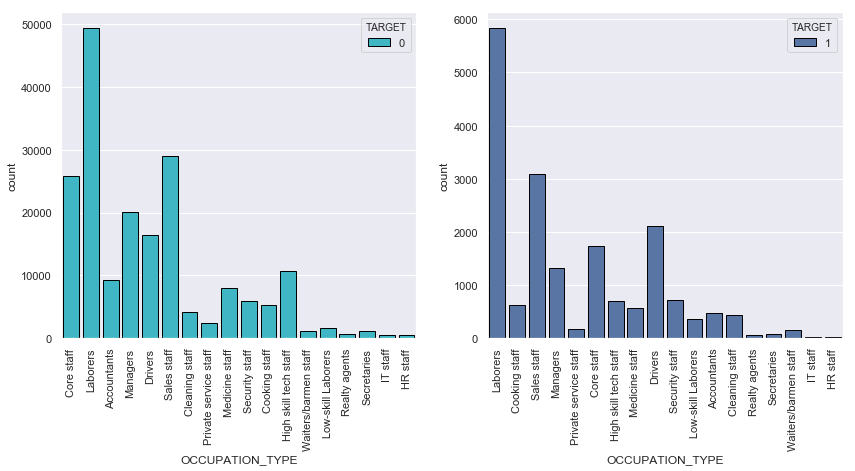

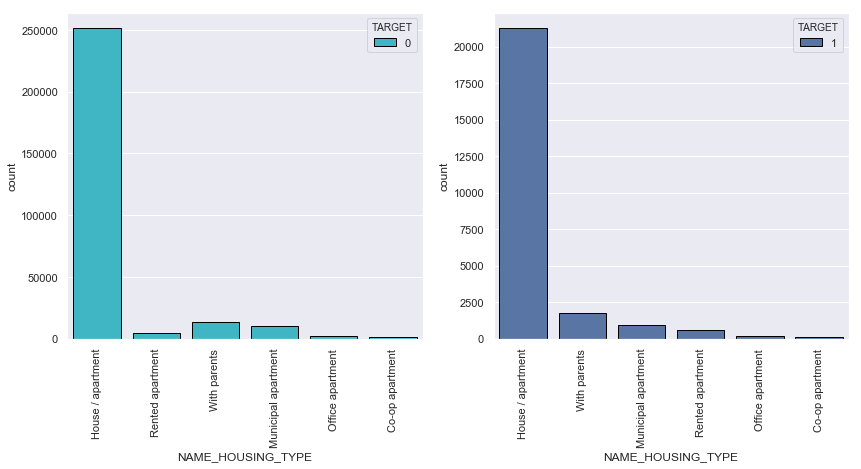

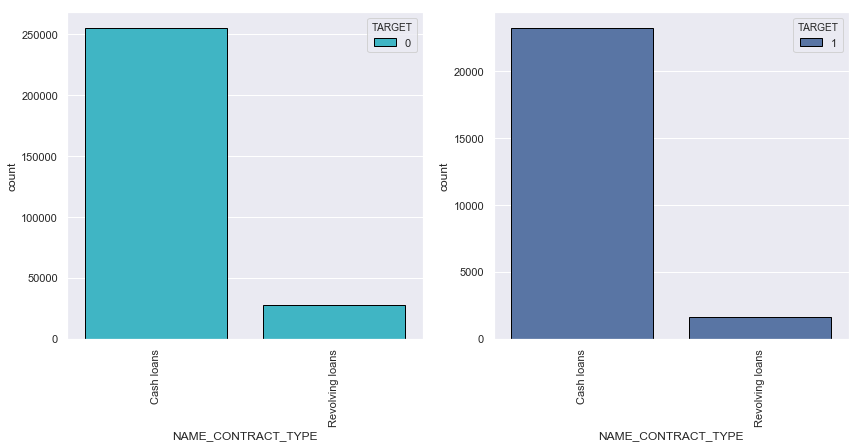

In [113]:
for feature in ['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
               'NAME_INCOME_TYPE' , 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE','NAME_CONTRACT_TYPE']:
    
    
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
   
    s=sns.countplot(data=app_0,x=feature,hue="TARGET",edgecolor=(0,0,0),palette="YlGnBu",saturation=1)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    plt.subplot(1,2,2)
    s=sns.countplot(data=app_1,x=feature,hue="TARGET",edgecolor=(0,0,0))
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

### Gender based Defaulters & Non-Defaulters
From the above graph, it is evident that Female applicants avail maximum loans and their default % is approximately 7.5%, 
wherein Male applicants default % is approx. 11.3%.
Women clients are almost twice as many men. We can infer that men have more difficulties in paying back.

### Education Type - Defaulter & Non-Defaulters 
Defaulters seems to be very insignificant among degree holders.
More contracts are seeked by secondary education holder and so is it defaulters.
Secondary education are the maximum loan seekers. The lower
secondary education have more difficulties in paying back.

### Income Type-Defaulters & Non-Defaulters
Looking at the graph working class has most loan contracts and the defaulters seem less compared to once who paid off.
Pensioners are paying off the loan and take less contracts.
So based on this working class,pensioners and even commercial associate can be given loans.

### Children count comparison for Defaulters & Non-Defaulters
Number of Children - Most customers have no children. The TARGET
variable is independent of the number of children as all categories show a
minimal risk 

### Family Status comparison for Defaulters & Non-Defaulters
Majority of clients are married, customers in Civil
Marriage/Single /Not married are more likely not to pay the loan.
Married people take most loans due to commitments and defaulters seem less.
Widows are the least defaulters but not many are loan seekers.

### Asset based Defaulters & Non-Defaulters
When we looked at the Defaulter & Non-Defaulter ratio based on Asset type,
Owning a car – Distribution for non-car owners is twice as much as car
owners but Customers with a car have less difficulty in paying back.
the data showcase applicant owning House are availing for more loan and their default ratio is around 10%, 
wherein applicant don’t own car also applying more loan. However, their default ratio is approx. 11.5%.

## STEP 4.5 
## Perform univariate analysis for categories of variables for both 0 and 1. Compare the target variable across categories of categorical variables.

### DAYS_EMPLOYED 

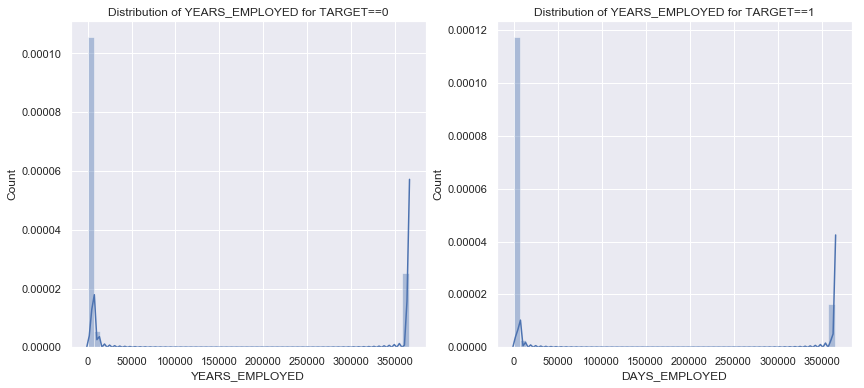

In [114]:
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
ax=sns.distplot(app_0['DAYS_EMPLOYED'])
plt.title('Distribution of YEARS_EMPLOYED for TARGET==0')
plt.xlabel('YEARS_EMPLOYED')
plt.ylabel('Count')

plt.subplot(1,2,2)
ax=sns.distplot(app_1['DAYS_EMPLOYED'])
plt.title('Distribution of YEARS_EMPLOYED for TARGET==1')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Count')
plt.show()

The variable is specified on the negative axis, we can
convert the column by using the absolute value of age. The more
experienced clients have less is the payment difficulty. The non-payment rate
is higher for newly working people and decreases with increasing experience.
The distribution is narrow and skewed for clients with payment difficulties. For
clients without payment difficulties the distribution is broad

### DAYS_BIRTH

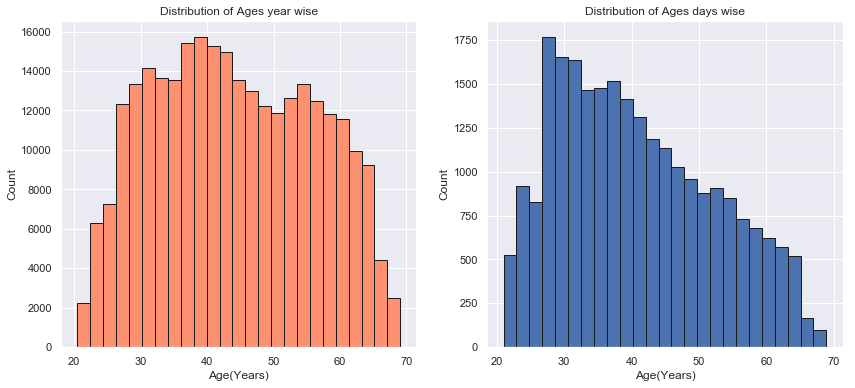

In [115]:
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.hist(app_0['DAYS_BIRTH']/365.25,edgecolor = 'k', bins = 25,color=["#fc9272"])
plt.title('Age of client')
plt.xlabel('Age(Years)')
plt.ylabel('Count')
plt.title('Distribution of Ages year wise')

plt.subplot(1,2,2)
plt.hist(app_1['DAYS_BIRTH']/365.25,edgecolor = 'k', bins = 25)
plt.title('Age of client')
plt.xlabel('Age(Years)')
plt.ylabel('Count')
plt.title('Distribution of Ages days wise')
plt.show()

DAYS_BIRTH – The age is specified on the negative axis, we can convert the column
by using the absolute value of age. The age is binned into 25 bins and both
histogram and density plot is done. The age is also transformed into year
The older the client, less is the payment difficulty. The non-payment rate is
higher for younger people and decreases with increasing age. The
distribution is narrow and skewed for clients with payment difficulties. For
clients without payment difficulties the distribution is broad.

### AMT_CREDIT

In [116]:
def plot_distribution(feature,color):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.title("TARGET==0 - Distribution of %s"% feature)
    sns.distplot(app_0[feature].dropna(),color=color,kde=True,bins=100)
    
    plt.subplot(1,2,2)
    plt.title("TARGET==1 - Distribution of %s"% feature)
    sns.distplot(app_1[feature].dropna(),color=color,kde=True,bins=100)
    plt.show()

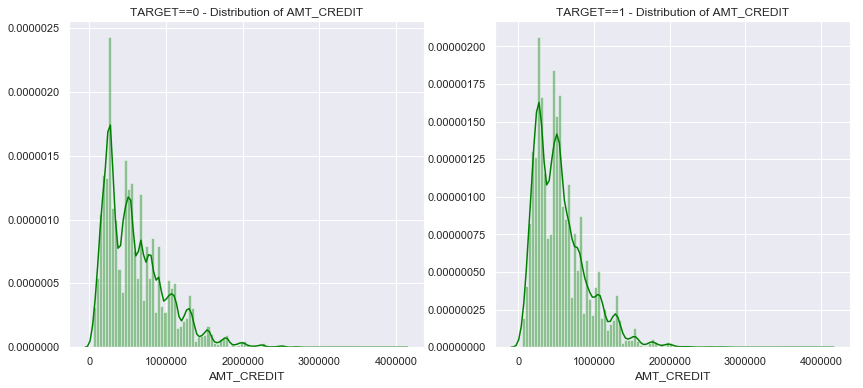

In [117]:
plot_distribution('AMT_CREDIT','green')

Loan Amount Distribution - As the density plot shows, most of the clients have loan crdits close to 10 lakhs . The higher the loan amount the credits are less.

### DAYS_LAST_PHONE_CHANGE

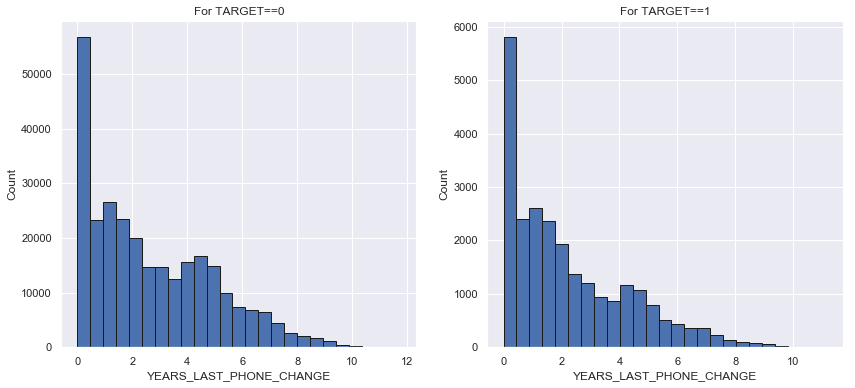

In [118]:
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.hist(app_0['DAYS_LAST_PHONE_CHANGE']/365.25,edgecolor = 'k', bins = 25)
plt.title('For TARGET==0')
plt.xlabel('YEARS_LAST_PHONE_CHANGE')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(app_1['DAYS_LAST_PHONE_CHANGE']/365.25,edgecolor = 'k', bins = 25)
plt.title('For TARGET==1')
plt.xlabel('YEARS_LAST_PHONE_CHANGE')
plt.ylabel('Count')
plt.show()

Applicant who have been changing phone number within a year are the applicant who default the most.
Further, the applicant who haven’t changed their phone number more than 3 years are less in terms of default. 

### AMT_INCOME_TOTAL

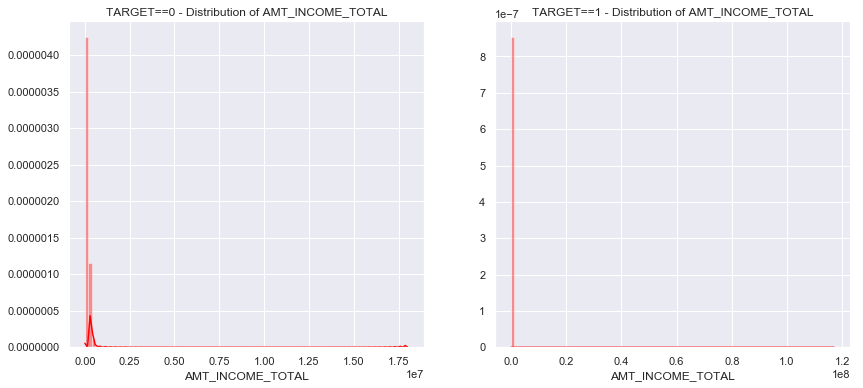

In [119]:
plot_distribution('AMT_INCOME_TOTAL','red')


Applicant Income has skewed distribution. Due to the number of outliers present in the dataset.
It quite difficult to see the distribution of values with the current arrangement. The data needs to be cleaned.

## AMOUNT ANNUITY

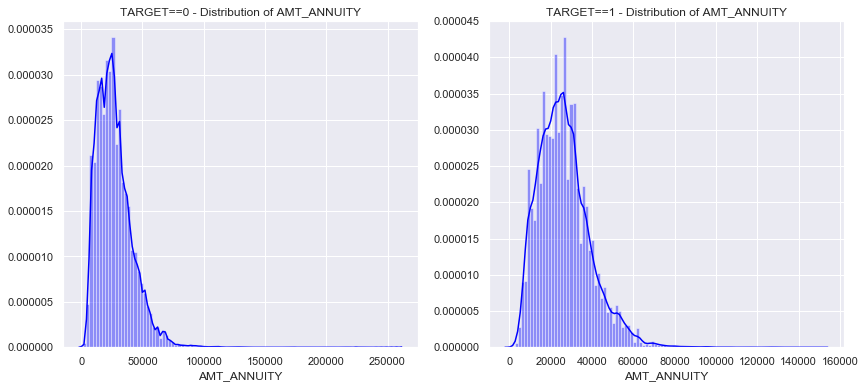

In [120]:
plot_distribution('AMT_ANNUITY','blue')

#### Linearity could be seen to some extend .Loans below 10 lakhs seems to be high and higher loans are riskier

## Plotting of Binned or Bracket columns - Age Group (YEARS_BINS), Income Group (INCOME_BINS), Annuity (ANNUITY_BINS) and Credit (CREDIT_BINS).

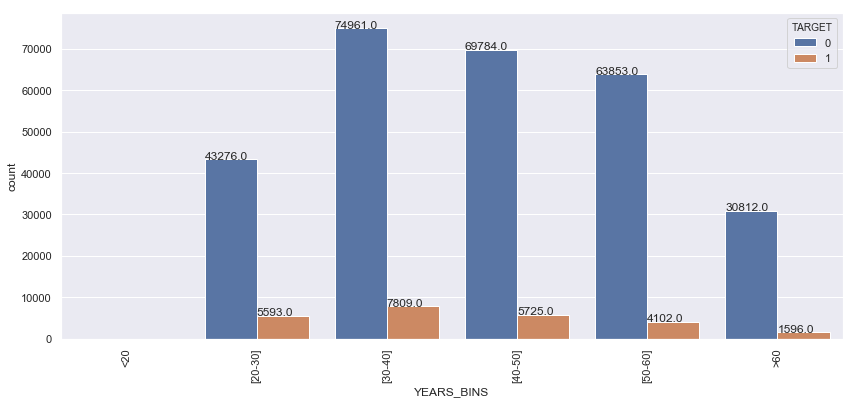

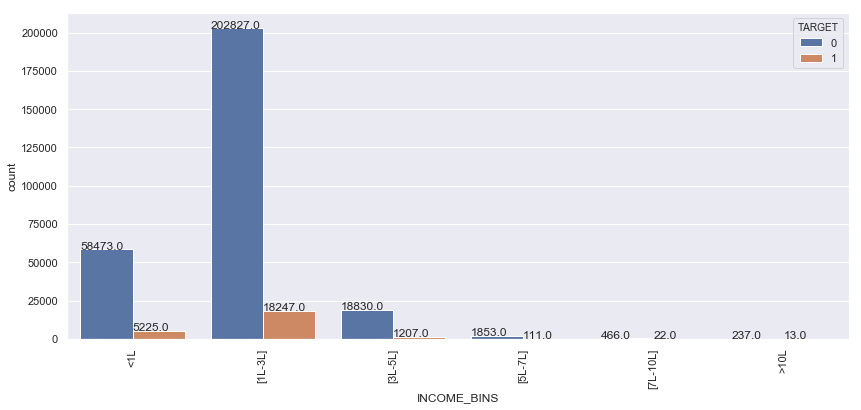

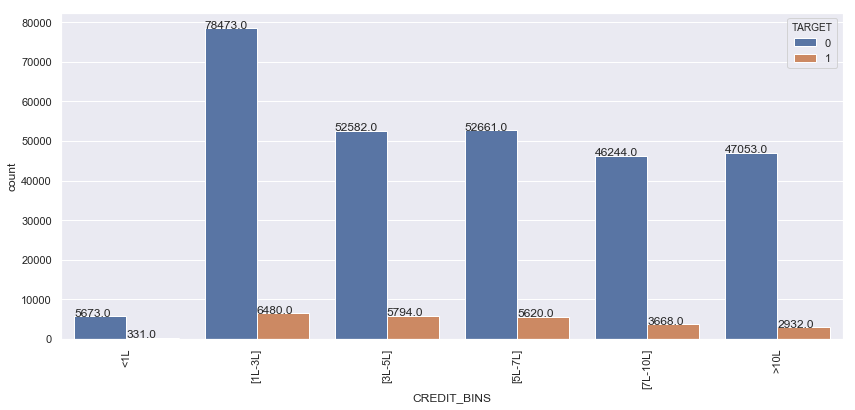

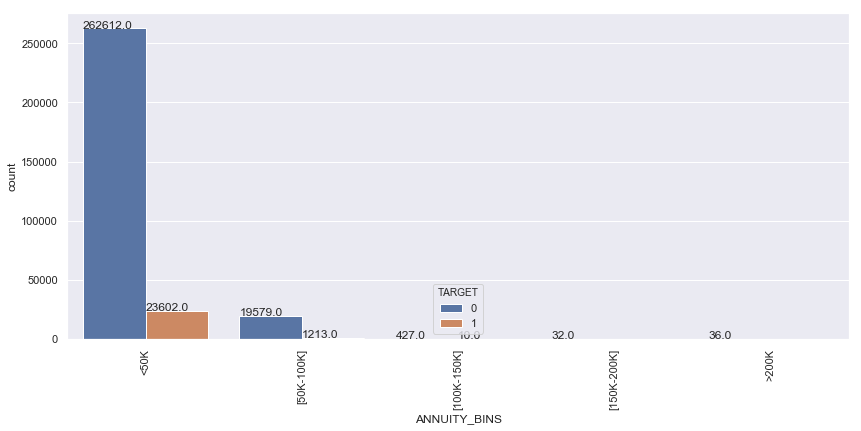

In [121]:
for feature in ['YEARS_BINS','INCOME_BINS','CREDIT_BINS','ANNUITY_BINS']:
    plt.figure(figsize = (14,6))
    ax = sns.countplot(x = feature, data = app, hue = "TARGET")
    plt.xticks(rotation = 90)
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
    plt.show()

## STEP 4.6 Perform bivariate analysis for numerical variables for both 0 and 1


### Analysis with Non-Default Age Group & Gender 

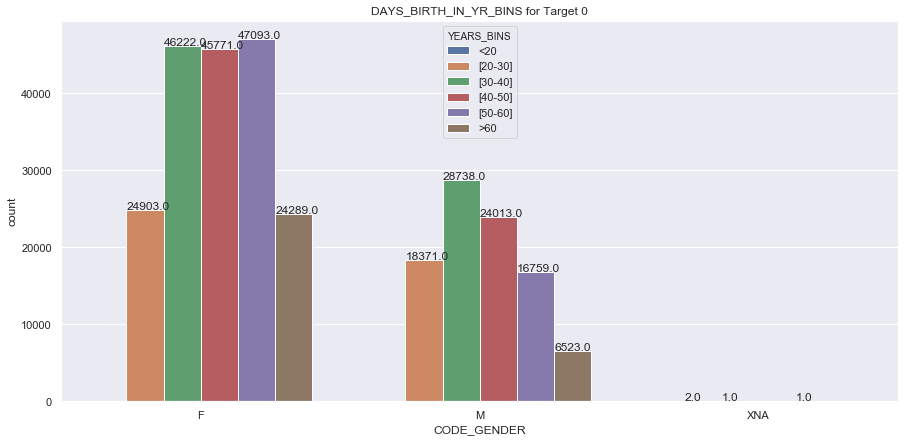

In [122]:
plt.figure(figsize = (15,7))

ax = sns.countplot(x = 'CODE_GENDER', data = app_0, hue =  'YEARS_BINS',
                  order = app_0['CODE_GENDER'].value_counts().index
                  )

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
plt.title("DAYS_BIRTH_IN_YR_BINS for Target 0")
plt.show()

### Analysis with Non-Default Age Group & Gender 

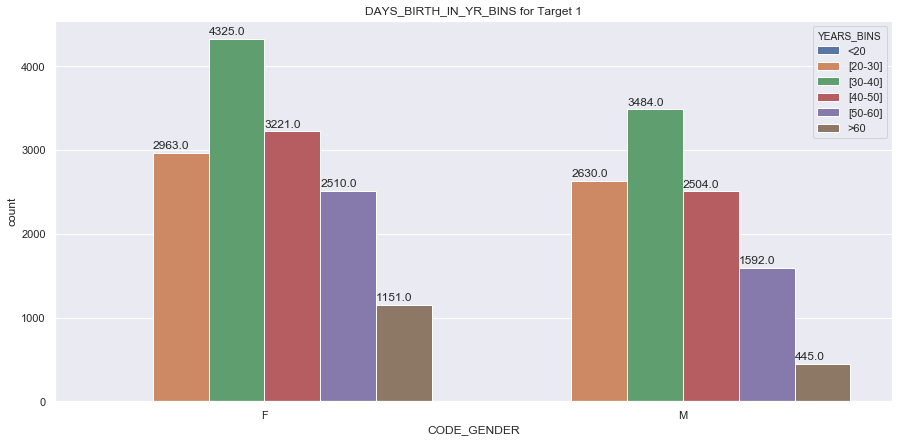

In [123]:
plt.figure(figsize = (15,7))

ax = sns.countplot(x = 'CODE_GENDER', data = app_1, hue =  'YEARS_BINS',
                  order = app_1['CODE_GENDER'].value_counts().index
                  )

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
plt.title("DAYS_BIRTH_IN_YR_BINS for Target 1")
plt.show()

### Analysis with Default Age Group & Gender 

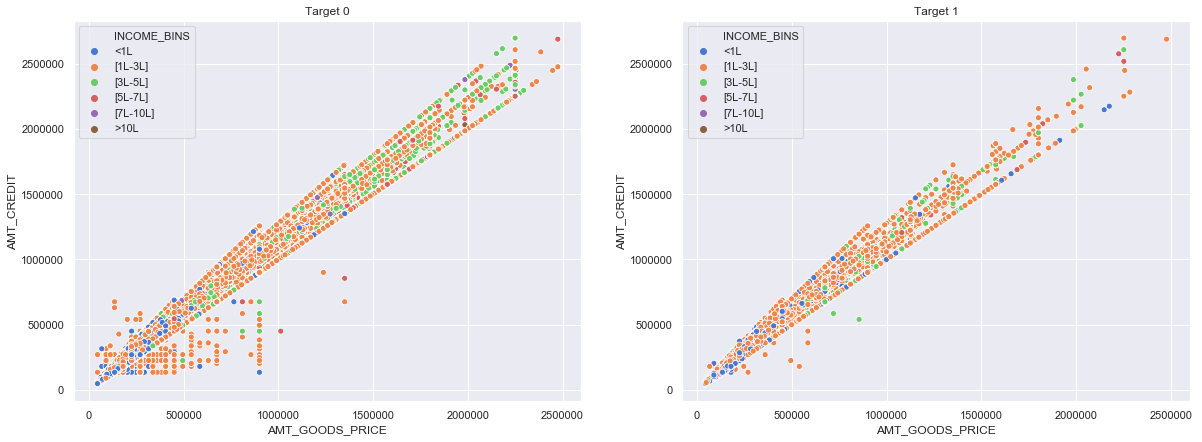

In [124]:
sns.set(color_codes=True)
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
ax = sns.scatterplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", 
                     data=app_0[(app_0['AMT_GOODS_PRICE'] <= 2.5e6)],
                     hue = 'INCOME_BINS',palette='muted')
#plt.xticks(rotation = 90)
plt.title("Target 0")

plt.subplot(1,2,2)
ax = sns.scatterplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", 
                     data=app_1[(app_1['AMT_GOODS_PRICE'] <= 2.5e6)],
                     hue = 'INCOME_BINS',palette = "muted")
                     
plt.title("Target 1")
plt.show()

Inference from the above scatterplot for <font color = red>Target = 0 and Target = 1 </font>
for different income groups
> 1. The positive slope of both the scatterplots reveals that there is a linear relationship between the Good's Price and Borrower's Credit 
> 2. Secondly, large chunk of borrowers fall in the income group of 1L to 3L

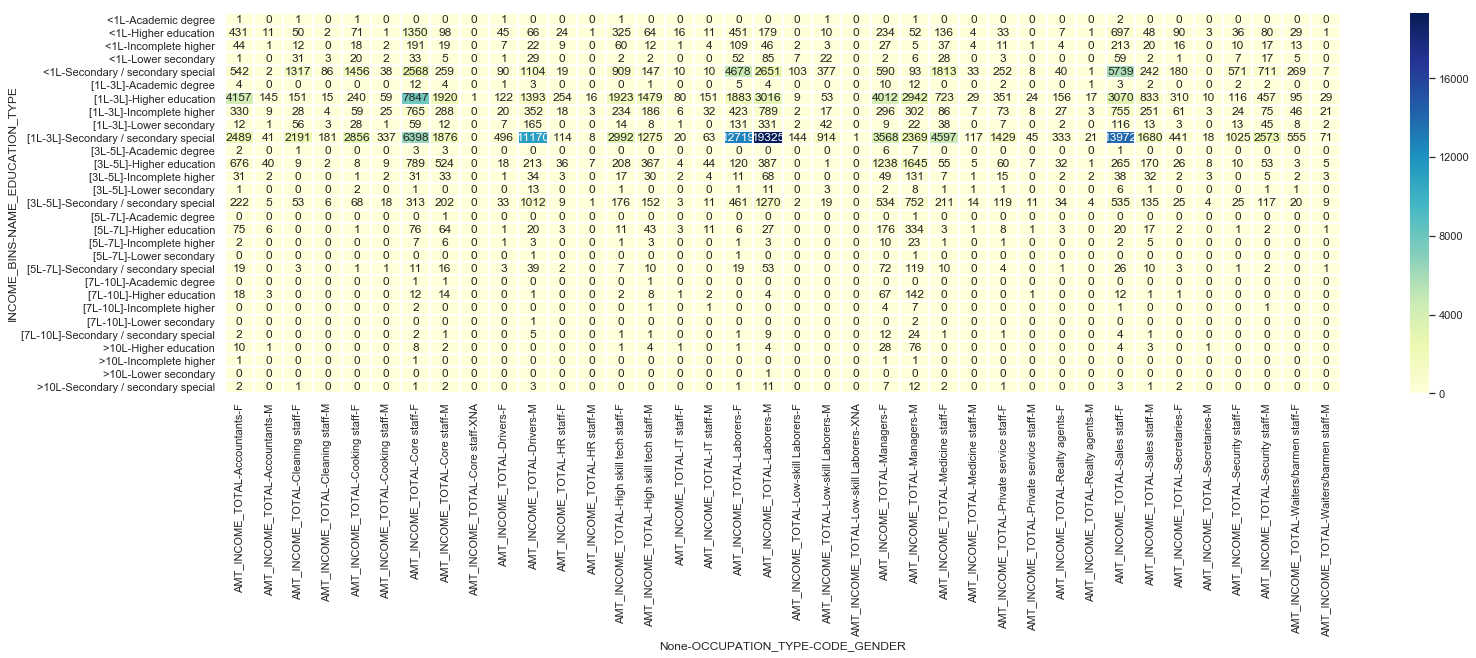

In [125]:
pt0 = pd.pivot_table(app_0, 
               index = ['INCOME_BINS', 'NAME_EDUCATION_TYPE'], 
               values = ['AMT_INCOME_TOTAL'], 
               columns = [ "OCCUPATION_TYPE", 'CODE_GENDER'],
               fill_value=0,
               aggfunc = 'count')

plt.figure(figsize = (25,7))
sns.heatmap(pt0, cmap = 'YlGnBu', annot=True, fmt="d", linewidths=1)
plt.show() 

Inference from the above heatmap for <font color = red>Target = 0 </font>
Non-defaulters** list comprises of 
> 1. Male laborers with income and credit between 1L & 3L and secondary education are highest 
> 2. Then comes Female Sales Staff with income between 1L & 3L and secondary education 
> 3. In the 3rd position is Female laborers with income between 1L & 3L and secondary education are highest
> 4. Male drivers with income between 1L & 3L and secondary education comes 4th

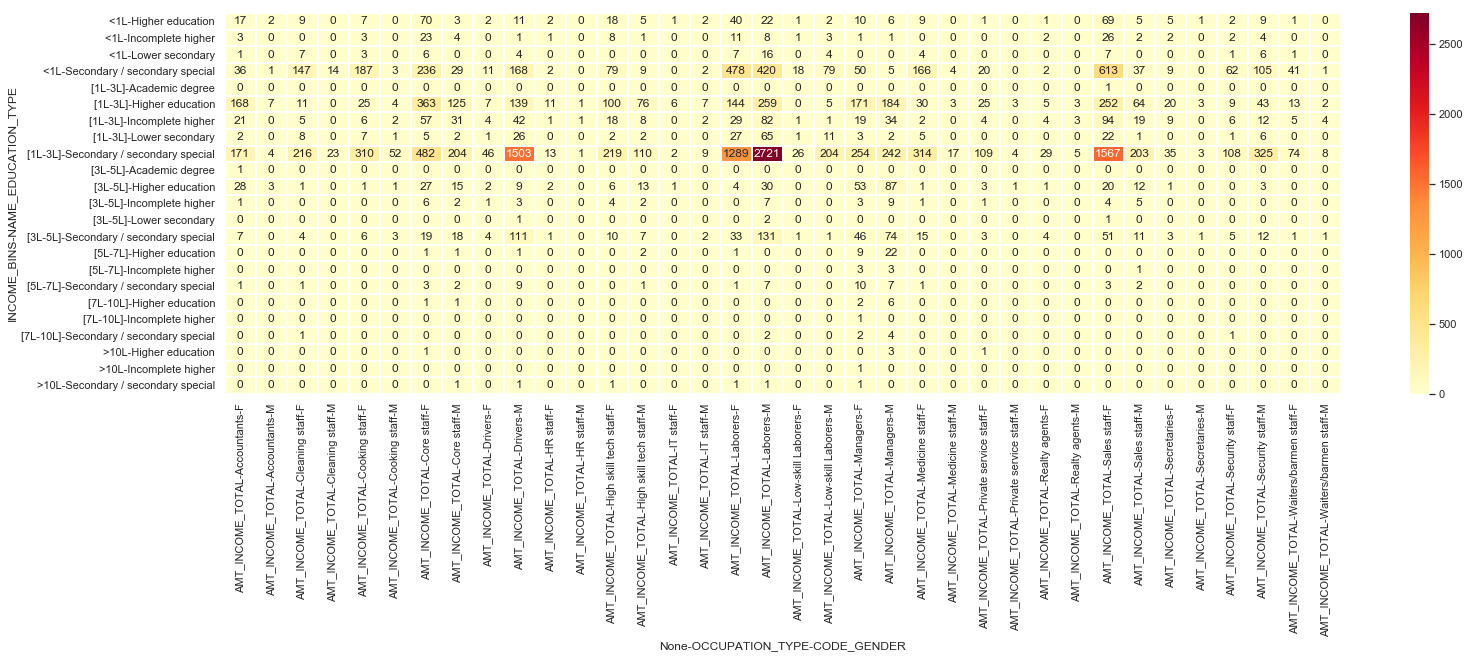

In [126]:
pt1 = pd.pivot_table(app_1, 
               index = ['INCOME_BINS', 'NAME_EDUCATION_TYPE'], 
               values = ['AMT_INCOME_TOTAL'], 
               columns = ['OCCUPATION_TYPE','CODE_GENDER'],
               fill_value=0,
               aggfunc = 'count')

plt.figure(figsize = (25,7))
sns.heatmap(pt1, cmap = 'YlOrRd', annot=True, fmt="d", linewidths=1)
plt.show()

Inference from the above heatmap for <font color = red>Target = 1 </font>
Defaulters** list comprises of 
> 1. Male laborers with income between 1L & 3L, credit between 1L & 7L and secondary education are highest 
> 2. Then comes Female Sales Staff and Male drivers with income between 1L & 3L and secondary education 
> 3. In the 3rd position is Female laborers with income between 1L & 3L and secondary education are highest

### Selecting reduced number of columns for analysis

In [127]:
app_red = app[['SK_ID_CURR', 'TARGET', 'CODE_GENDER',
               'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 
               'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
               'INCOME_BINS', 'CREDIT_BINS', 'ANNUITY_BINS','AMT_GOODS_PRICE', 
               'NAME_CONTRACT_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
               'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
               'DAYS_EMPLOYED','YEARS_BINS','OCCUPATION_TYPE',
               
               ]]
app_red.shape

(307511, 20)

In [128]:
app_red.nunique().sort_values(ascending = False)

SK_ID_CURR             307511
AMT_ANNUITY             13673
DAYS_EMPLOYED           12574
AMT_CREDIT               5603
AMT_INCOME_TOTAL         2548
AMT_GOODS_PRICE          1002
CNT_FAM_MEMBERS            18
OCCUPATION_TYPE            18
CNT_CHILDREN               15
NAME_INCOME_TYPE            8
INCOME_BINS                 6
NAME_FAMILY_STATUS          6
NAME_HOUSING_TYPE           6
CREDIT_BINS                 6
ANNUITY_BINS                5
YEARS_BINS                  5
NAME_EDUCATION_TYPE         5
CODE_GENDER                 3
NAME_CONTRACT_TYPE          2
TARGET                      2
dtype: int64

In [129]:
app_red.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
SK_ID_CURR             307511 non-null int64
TARGET                 307511 non-null int64
CODE_GENDER            307511 non-null object
CNT_FAM_MEMBERS        307511 non-null object
CNT_CHILDREN           307511 non-null object
AMT_INCOME_TOTAL       307511 non-null float64
AMT_CREDIT             307511 non-null float64
AMT_ANNUITY            307511 non-null float64
INCOME_BINS            307511 non-null category
CREDIT_BINS            307511 non-null category
ANNUITY_BINS           307511 non-null category
AMT_GOODS_PRICE        307233 non-null float64
NAME_CONTRACT_TYPE     307511 non-null object
NAME_INCOME_TYPE       307511 non-null object
NAME_EDUCATION_TYPE    307511 non-null object
NAME_FAMILY_STATUS     307511 non-null object
NAME_HOUSING_TYPE      307511 non-null object
DAYS_EMPLOYED          307511 non-null int64
YEARS_BINS             307511 non-null category
OCCUPA

In [130]:
missing_value(app_red)

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
AMT_GOODS_PRICE,278,0.090403
INCOME_BINS,0,0.000000
TARGET,0,0.000000
CODE_GENDER,0,0.000000
CNT_FAM_MEMBERS,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,0,0.000000


The above table includes the remanining columns having no null and negligible null values.
We are considering only few columns for furthur analysis.

Columns considered from application file for evaluation: 
SK_ID_CURR, NAME_CONTRACT_TYPE , CODE_GENDER,FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN,
AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE,NAME_INCOME_TYPE,
NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE 

In [131]:
# Separating Target 0 & Target 1 for current data and AMT_INCOME_TOTAL >= 1L & AMT_INCOME_TOTAL <= 5L 
app_target_0 = app_red[(app_red["TARGET"] == 0) & 
                       (app_red["AMT_INCOME_TOTAL"] >= 1e5) &
                       (app_red["AMT_INCOME_TOTAL"] <= 5e5)]

app_target_1 = app_red[(app_red["TARGET"] == 1) & 
                       (app_red["AMT_INCOME_TOTAL"] >= 1e5) &
                       (app_red["AMT_INCOME_TOTAL"] <= 5e5)]

app_target_0 = app_target_0.reset_index(drop = True)
app_target_1 = app_target_1.reset_index(drop = True)

## STEP 4.5 Find the correlation for numerical columns for both cases 0 and 1 and check for the variables with highest correlation are the same in both or not.

### Correlation of Target ==1 (Defaulters)

In [132]:
cor1 = app_target_1.corr()
corr_table1 = cor1.where(np.triu(np.ones(cor1.shape), k = 1).astype(np.bool)).unstack().reset_index()
corr_table1.columns = ['Term 1', "Term 2", 'Correlation']
corr_table1.dropna(subset = ["Correlation"], inplace = True)
corr_table1['Correlation'] = corr_table1['Correlation'].abs()
corr_table1.sort_values(by = ['Correlation'],ascending = False, inplace = True)
corr_table1.head(12)

,Term 1,Term 2,Correlation
38,AMT_GOODS_PRICE,AMT_CREDIT,0.982402
39,AMT_GOODS_PRICE,AMT_ANNUITY,0.730228
31,AMT_ANNUITY,AMT_CREDIT,0.726954
30,AMT_ANNUITY,AMT_INCOME_TOTAL,0.339818
37,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.287896
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.284384
44,DAYS_EMPLOYED,AMT_INCOME_TOTAL,0.053435
46,DAYS_EMPLOYED,AMT_ANNUITY,0.051468
47,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.030184
45,DAYS_EMPLOYED,AMT_CREDIT,0.026879


There is strong correlation between Amt Good Price & Amt Credit.This suggest that the bank has approved approx. 98% of the loan applied. 

### Correlation of Target == 0 (Non - Defaulters)

In [133]:
cor1 = app_target_0.corr()
corr_table1 = cor1.where(np.triu(np.ones(cor1.shape), k = 1).astype(np.bool)).unstack().reset_index()
corr_table1.columns = ['Term 1', "Term 2", 'Correlation']
corr_table1.dropna(subset = ["Correlation"], inplace = True)
corr_table1['Correlation'] = corr_table1['Correlation'].abs()
corr_table1.sort_values(by = ['Correlation'],ascending = False, inplace = True)
corr_table1.head(12)

,Term 1,Term 2,Correlation
38,AMT_GOODS_PRICE,AMT_CREDIT,0.986303
39,AMT_GOODS_PRICE,AMT_ANNUITY,0.752792
31,AMT_ANNUITY,AMT_CREDIT,0.746698
30,AMT_ANNUITY,AMT_INCOME_TOTAL,0.393184
37,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.331944
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.325548
44,DAYS_EMPLOYED,AMT_INCOME_TOTAL,0.095817
46,DAYS_EMPLOYED,AMT_ANNUITY,0.052662
45,DAYS_EMPLOYED,AMT_CREDIT,0.019934
47,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.018431


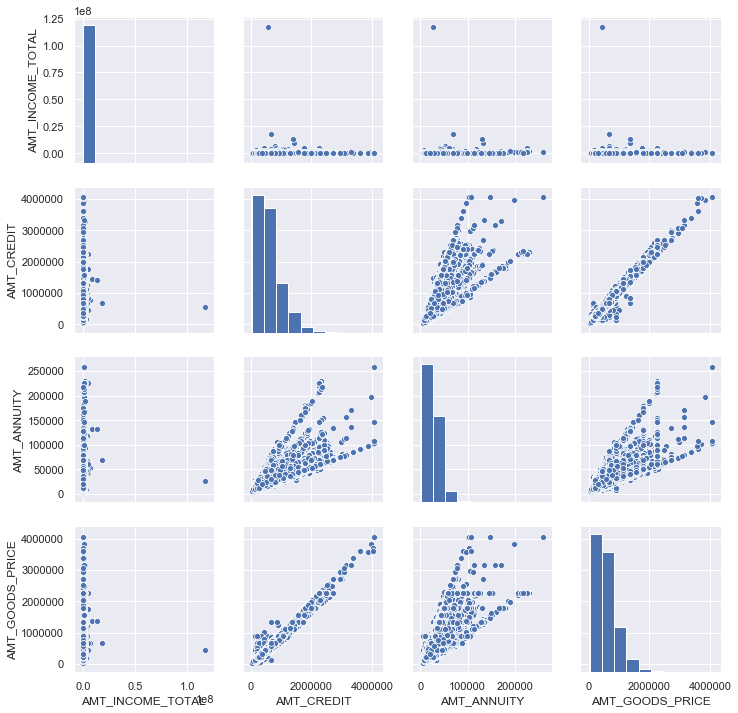

In [134]:
sns.pairplot(data=app,vars=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])
plt.show()

# Previous Application Data 

In [138]:
prev_app=pd.read_csv("previous_application.csv")
pd.set_option('display.max_columns',100)

In [139]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#checking the rows and columns in the prev_app_dataframe
a=len(prev_app.index)
b=len(prev_app.columns)
print("Number of rows:"+str(a))
print("Number of columns:"+str(b))

Number of rows:1670214
Number of columns:37


### Null value analysis of Previous Application Data

In [141]:
prev_app.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [142]:
prev_app_red = prev_app[['SK_ID_PREV', 'SK_ID_CURR', 
                'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE', 
                'AMT_APPLICATION', 'AMT_CREDIT']
               ]

In [143]:
prev_app_pt = pd.pivot_table(prev_app_red, index = ['SK_ID_CURR',  'NAME_CONTRACT_STATUS'], 
               values = ['SK_ID_PREV'],
               #columns = ['NAME_CONTRACT_STATUS'],
               aggfunc = ['count']
              )
prev_app_pt

count
                                SK_ID_PREV
SK_ID_CURR NAME_CONTRACT_STATUS           
100001     Approved                      1
100002     Approved                      1
100003     Approved                      3
100004     Approved                      1
100005     Approved                      1
           Canceled                      1
100006     Approved                      5
           Canceled                      3
           Refused                       1
100007     Approved                      6
100008     Approved                      4
           Canceled                      1
100009     Approved                      7
100010     Approved                      1
100011     Approved                      3
           Refused                       1
100012     Approved                      3
           Canceled                      1
100013     Approved                      3
           Canceled                      1
100014     Approved                      2
100015     Approved                      1
100016     Approved                      4
100017     Approved                      2
100018     Approved                      4
100019     Approved                      1
100020     Approved                      2
100021     Approved                      6
100022     Approved                      1
100023     Approved                      4
...                                    ...
456237     Refused                       1
456238     Approved                      1
           Unused offer                  1
456239     Approved                      2
456240     Approved                      4
           Canceled                      1
456241     Approved                      6
           Canceled                      3
456242     Approved                      4
456243     Approved                      3
           Refused                       4
456244     Approved                     12
           Canceled                      5
           Refused                       1
456245     Approved                      2
456246     Approved                      2
456247     Approved                      4
           Refused                       1
456248     Approved                      4
456249     Approved                      1
           Refused                       1
456250     Approved                      4
           Canceled                      3
           Refused                       1
456251     Approved                      1
456252     Approved                      1
456253     Approved                      2
456254     Approved                      2
456255     Approved                      6
           Refused                       2

[610748 rows x 1 columns]

In [144]:
missing_value(prev_app).head(25)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


### Remove null values

In [146]:
prev_app=removeNulls(prev_app,axis=1,percent=0.13)

Number of Columns dropped	:  0

Old dataset rows,columns (1670214, 23) 
New dataset rows,columns (1670214, 23)


In [147]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.752339e+05,1.961140e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02
std,5.325980e+05,1.028148e+05,2.927798e+05,3.185746e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00
25%,1.461857e+06,1.893290e+05,1.872000e+04,2.416050e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00
50%,1.923110e+06,2.787145e+05,7.104600e+04,8.054100e+04,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00
75%,2.384280e+06,3.675140e+05,1.803600e+05,2.164185e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01
max,2.845382e+06,4.562550e+05,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06


In [148]:
prev_app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [149]:
prev_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [150]:
prev_app['PRODUCT_COMBINATION'].value_counts(normalize=True)

Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

## STEP 5
## Merged Application & Previous Application Data Set

In [151]:
app_prev_merge=pd.merge(left=app,right=prev_app,how='inner',left_on='SK_ID_CURR',right_on='SK_ID_CURR')
app_prev_merge.reset_index(inplace=True)

In [152]:
a=len(app_prev_merge.index)
b=len(app_prev_merge.columns)
print("Number of rows:"+str(a))
print("Number of columns:"+str(b))

Number of rows:1413701
Number of columns:109


In [153]:
app_prev_merge.shape

(1413701, 109)

In [154]:
app_prev_merge.columns

Index(['index', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x',
       ...
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object', length=109)

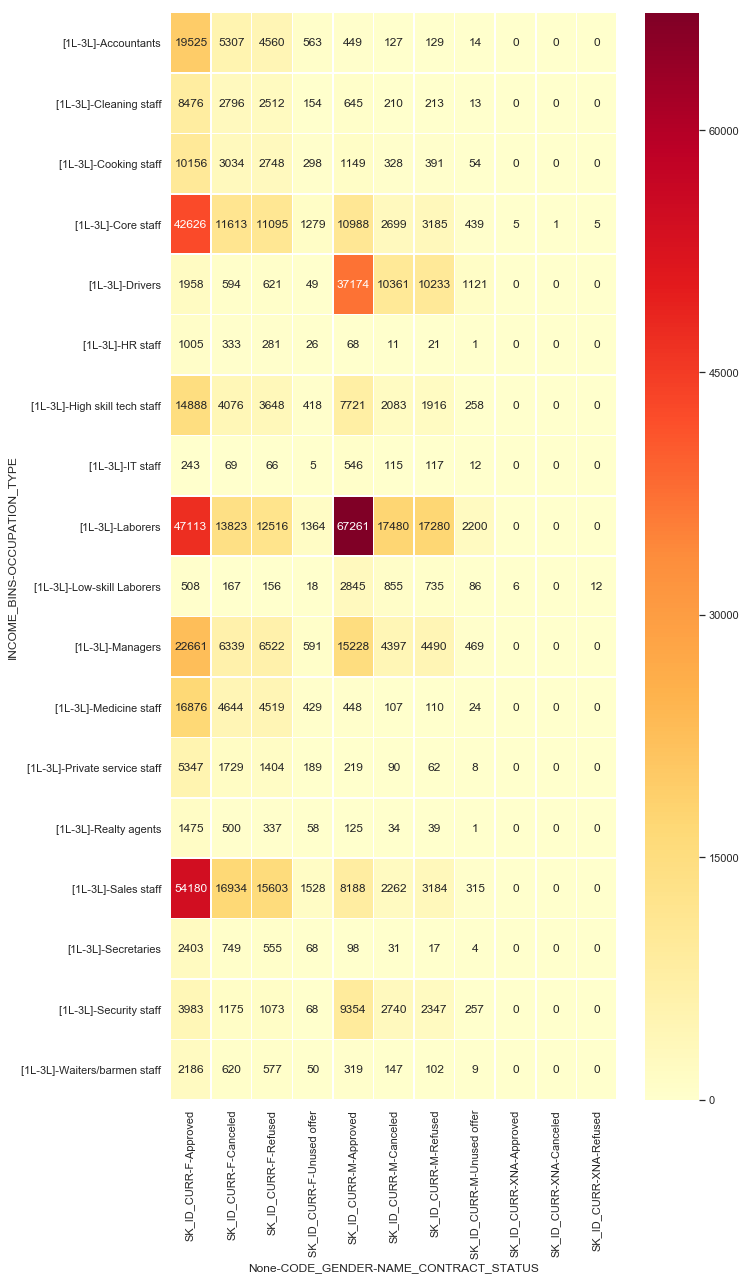

In [155]:
Merge_Tar_0 = pd.pivot_table(app_prev_merge[(app_prev_merge['INCOME_BINS'] == '[1L-3L]') & (app_prev_merge['TARGET'] == 0)], 
               index = ['INCOME_BINS',  "OCCUPATION_TYPE"], 
               values = ['SK_ID_CURR'], 
               columns = [ 'CODE_GENDER', 'NAME_CONTRACT_STATUS'],
               fill_value=0,
               aggfunc = 'count')

plt.figure(figsize = (10,20))
sns.heatmap(Merge_Tar_0, cmap = 'YlOrRd', annot=True, fmt="d", linewidths=.5)
plt.show()

The above heatmap is plotted for the combined data of previous and current borrowers with Target = 0
> 1. Most of the current non-defaulters were male labourers belonging to salary group [1L-3L], and their loans were previously approved maxium number of times
> 2. Then the 2nd most loan approved catageory was of Sales Staff, in 1L-3L income bracket.

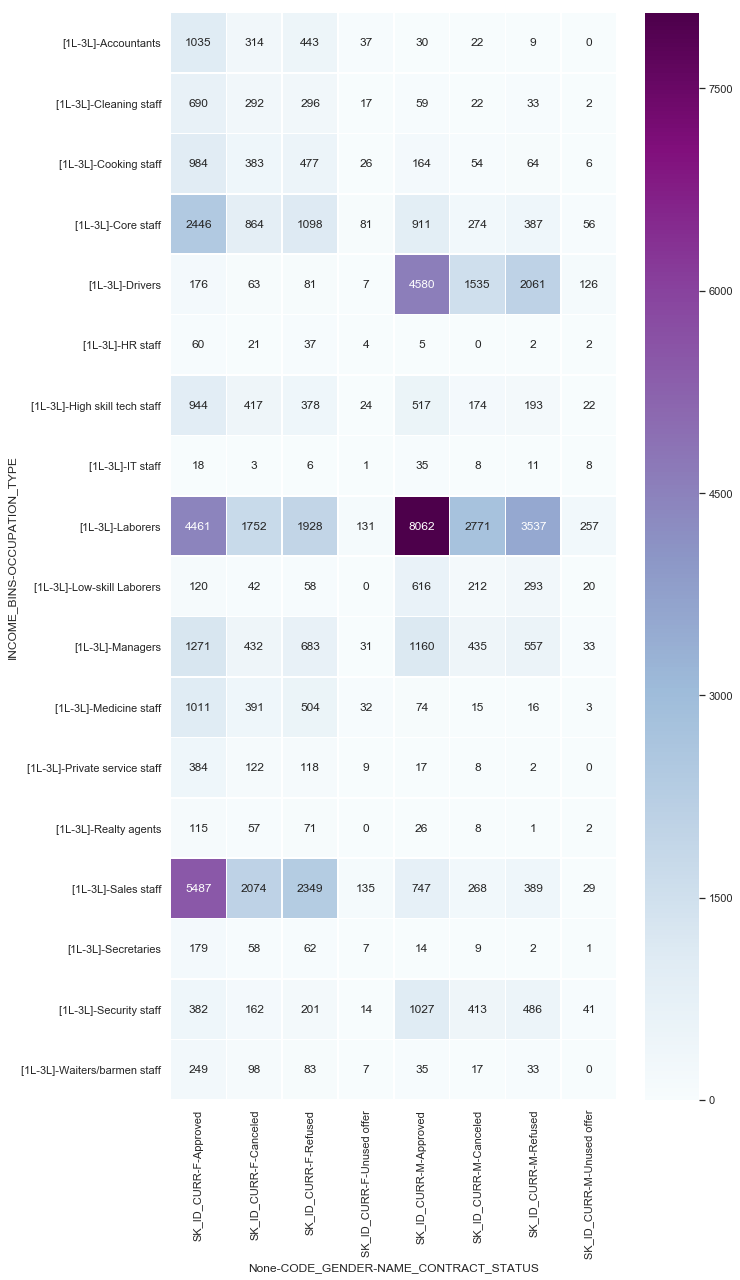

In [156]:
Merge_Tar_1 = pd.pivot_table(app_prev_merge[(app_prev_merge['INCOME_BINS'] == '[1L-3L]') & (app_prev_merge['TARGET'] == 1)], 
               index = ['INCOME_BINS','OCCUPATION_TYPE'], 
               values = ['SK_ID_CURR'], 
               columns = [ 'CODE_GENDER', 'NAME_CONTRACT_STATUS'],
               fill_value=0,
               aggfunc = 'count')

plt.figure(figsize = (10,20))
sns.heatmap(Merge_Tar_1, cmap = 'BuPu', annot=True, fmt="d", linewidths=.5)
plt.show()

The above heatmap is plotted for the combined data of previous and current borrowers with Target = 1
> 1. Most of the current defaulters were male labourers belonging to salary group [1L-3L],but looking at the ratio of non- defaulters ,it is way less- and their loans were previously approved maxium number of times
> 2. Then the 2nd most loan approved catageory was of Sales Staff, in 1L-3L income bracket.

### Analysis based on contract status from the previous application 

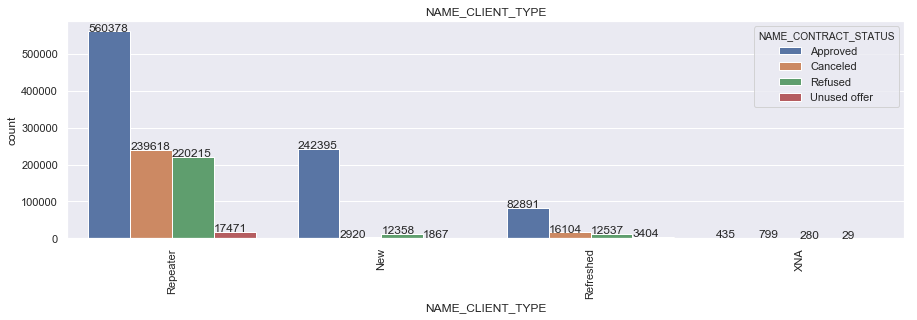

In [157]:
plt.figure(figsize = (15,4))

ax = sns.countplot(x = 'NAME_CLIENT_TYPE', data = app_prev_merge, hue = "NAME_CONTRACT_STATUS", 
                  order = app_prev_merge['NAME_CLIENT_TYPE'].value_counts().index)
plt.xticks(rotation = 90)
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
plt.title("NAME_CLIENT_TYPE")
plt.show()

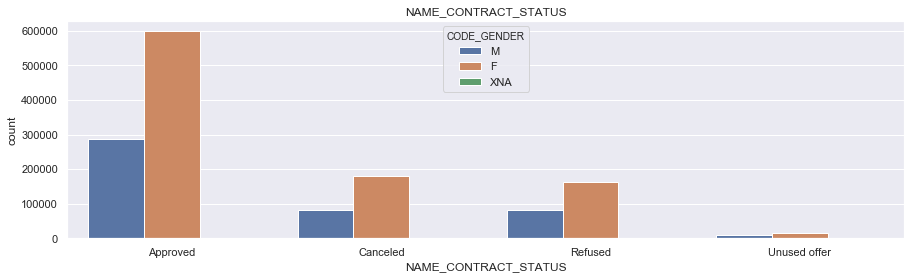

In [158]:
plt.figure(figsize = (15,4))

ax = sns.countplot(x = 'NAME_CONTRACT_STATUS', data = app_prev_merge, hue = "CODE_GENDER", 
                  order = app_prev_merge['NAME_CONTRACT_STATUS'].value_counts().index)

plt.title("NAME_CONTRACT_STATUS")
plt.show()

### Female loans were mostly approved than male .

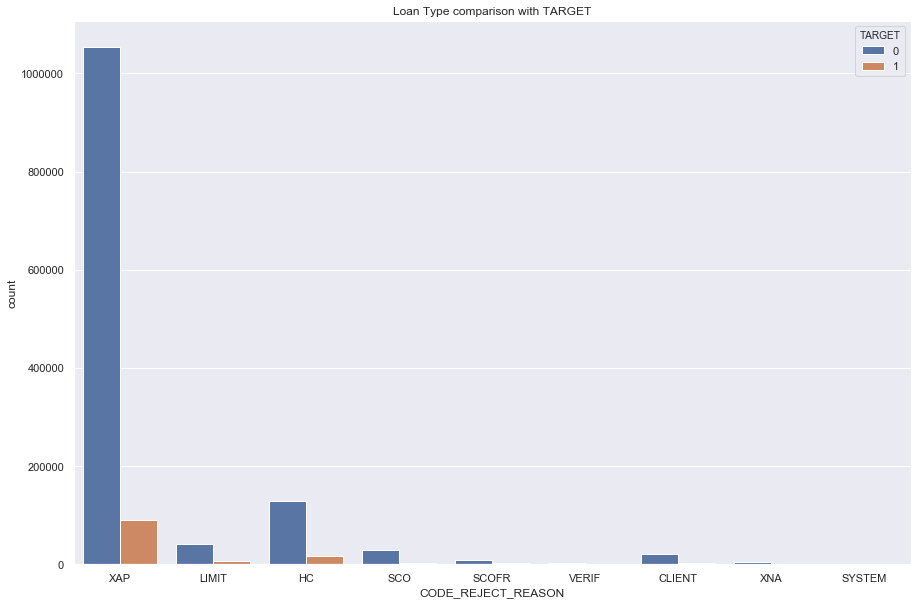

In [159]:
plt.figure(figsize=(15,10))
sns.countplot(data=app_prev_merge,x="CODE_REJECT_REASON",hue="TARGET",)
plt.title('Loan Type comparison with TARGET')
plt.show()

Rejection Reason XAP  might be non availability of certain crucial datas

# Data Outlier

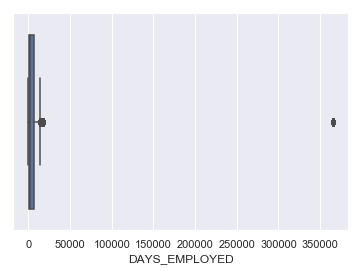

In [160]:
sns.boxplot(x='DAYS_EMPLOYED',data=app_prev_merge)
plt.show()

### The distribution of Days_Employed is having records 365243 days employed, we think this data is an outlier.  

In [161]:
app_lar = app[[ 'TARGET', 'CODE_GENDER',
               'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 
               'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
               'INCOME_BINS', 'CREDIT_BINS', 'ANNUITY_BINS','AMT_GOODS_PRICE', 
               'NAME_CONTRACT_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
               'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
               'DAYS_EMPLOYED','YEARS_BINS','OCCUPATION_TYPE',
               
               ]]

### HEATMAP representation for key variable with the important columns in Application

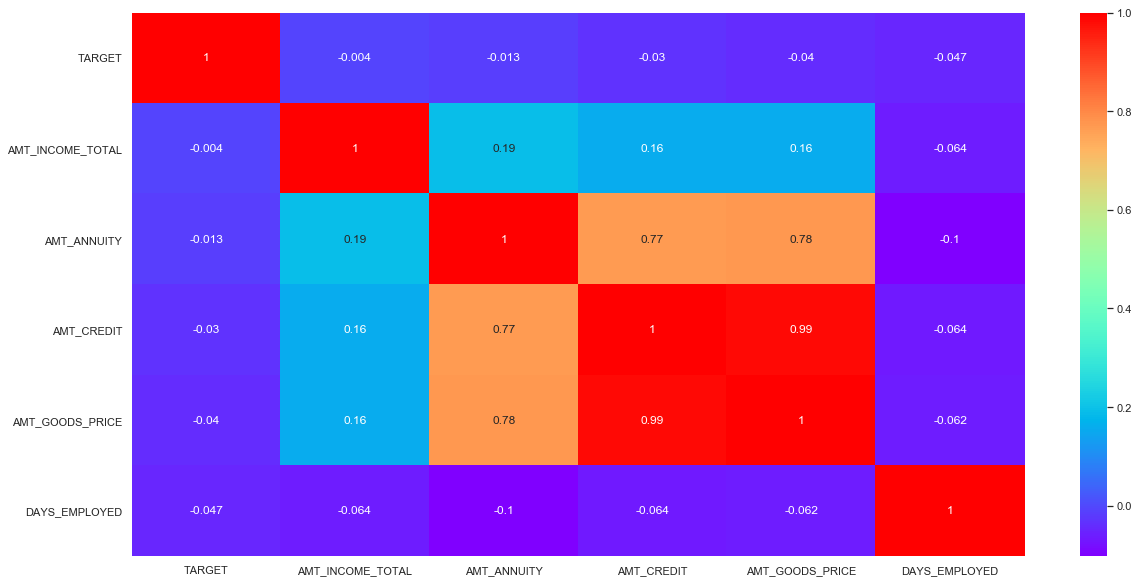

In [162]:
k = 20 #number of variables for heatmap
cols = app_lar.corr().nlargest(k, 'TARGET')['TARGET'].index
cm = app_lar[cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'rainbow')
plt.show()

### For Inference & Recommendation please refer to PPT. 